Wrangle

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env
import wrangle
from wrangle import get_data_from_mysql

For the first iteration of your model, use only square feet of the home, number of bedrooms, and number of bathrooms to estimate the properties assessed value, 'taxvaluedollarcnt'.

In [2]:
from env import host, user, password

In [92]:

df=wrangle.get_data_from_mysql()

Clean

In [93]:
df= df = df.drop('propertylandusedesc', axis =1)

In [94]:
df= df = df.rename(columns={"bedroomcnt": "bedrooms", "bathroomcnt": "bathrooms", "calculatedfinishedsquarefeet": "squarefeet", 'taxvaluedollarcnt':'tax'})

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16035 entries, 0 to 16034
Data columns (total 6 columns):
id                       16035 non-null int64
bedrooms                 16035 non-null float64
bathrooms                16035 non-null float64
tax                      16033 non-null float64
propertylandusetypeid    16035 non-null float64
squarefeet               16035 non-null float64
dtypes: float64(5), int64(1)
memory usage: 751.7 KB


In [96]:
df.head()

,id,bedrooms,bathrooms,tax,propertylandusetypeid,squarefeet
0,6926,3.0,1.0,305481.0,261.0,1136.0
1,31568,3.0,2.0,418694.0,261.0,2104.0
2,31569,2.0,1.0,169843.0,261.0,872.0
3,31570,3.0,1.0,194005.0,261.0,1190.0
4,31571,3.0,2.0,288259.0,261.0,1534.0


In [98]:
X = df[['bedrooms', 'bathrooms','squarefeet']]
y= df['tax']

Summarize Data

In [99]:
df.describe()

,id,bedrooms,bathrooms,tax,propertylandusetypeid,squarefeet
count,16035.000000,16035.000000,16035.000000,1.603300e+04,16035.0,16035.000000
mean,42328.056190,3.242906,2.208170,4.626769e+05,261.0,1834.159464
std,6530.193495,0.965182,1.032515,6.435174e+05,0.0,988.938585
min,1772.000000,0.000000,0.000000,3.257000e+03,261.0,60.000000
25%,36973.500000,3.000000,2.000000,1.810300e+05,261.0,1231.000000
50%,41644.000000,3.000000,2.000000,3.191760e+05,261.0,1590.000000
75%,48000.500000,4.000000,3.000000,5.281200e+05,261.0,2160.000000
max,53503.000000,25.000000,20.000000,1.912982e+07,261.0,26345.000000


In [100]:
df.dtypes

id                         int64
bedrooms                 float64
bathrooms                float64
tax                      float64
propertylandusetypeid    float64
squarefeet               float64
dtype: object

In [127]:
df.describe()

,id,bedrooms,bathrooms,tax,propertylandusetypeid,squarefeet
count,16035.000000,16035.000000,16035.000000,1.603300e+04,16035.0,16035.000000
mean,42328.056190,3.242906,2.208170,4.626769e+05,261.0,1834.159464
std,6530.193495,0.965182,1.032515,6.435174e+05,0.0,988.938585
min,1772.000000,0.000000,0.000000,3.257000e+03,261.0,60.000000
25%,36973.500000,3.000000,2.000000,1.810300e+05,261.0,1231.000000
50%,41644.000000,3.000000,2.000000,3.191760e+05,261.0,1590.000000
75%,48000.500000,4.000000,3.000000,5.281200e+05,261.0,2160.000000
max,53503.000000,25.000000,20.000000,1.912982e+07,261.0,26345.000000


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16035 entries, 0 to 16034
Data columns (total 6 columns):
id                       16035 non-null int64
bedrooms                 16035 non-null float64
bathrooms                16035 non-null float64
tax                      16033 non-null float64
propertylandusetypeid    16035 non-null float64
squarefeet               16035 non-null float64
dtypes: float64(5), int64(1)
memory usage: 751.7 KB


Split and Scale 

In [102]:
X = df[['bedrooms', 'bathrooms','squarefeet']]
y = df[['tax']]

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=101)

Exploration

In [105]:
import statsmodels.api as sm

#OLS object to analyze features

ols_model = sm.OLS(y_train,X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    tax   R-squared (uncentered):                   0.606
Model:                            OLS   Adj. R-squared (uncentered):              0.606
Method:                 Least Squares   F-statistic:                              2466.
Date:                Fri, 18 Oct 2019   Prob (F-statistic):                        0.00
Time:                        11:18:42   Log-Likelihood:                         -69538.
No. Observations:                4810   AIC:                                  1.391e+05
Df Residuals:                    4807   BIC:                                  1.391e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bedrooms   -1.266e+05   6447.383    -19.640      0.000   -1.39e+05   -1.14e+05
bathrooms   9.314e+04   1.24e+04      7.530      0.000    6.89e+04    1.17e+05
squarefeet   361.3968     13.229     27.319      0.000     335.462     387.331
==============================================================================
Omnibus:                     6896.601   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4579086.919
Skew:                           8.191   Prob(JB):                         0.00
Kurtosis:                     153.265   Cond. No.                     3.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

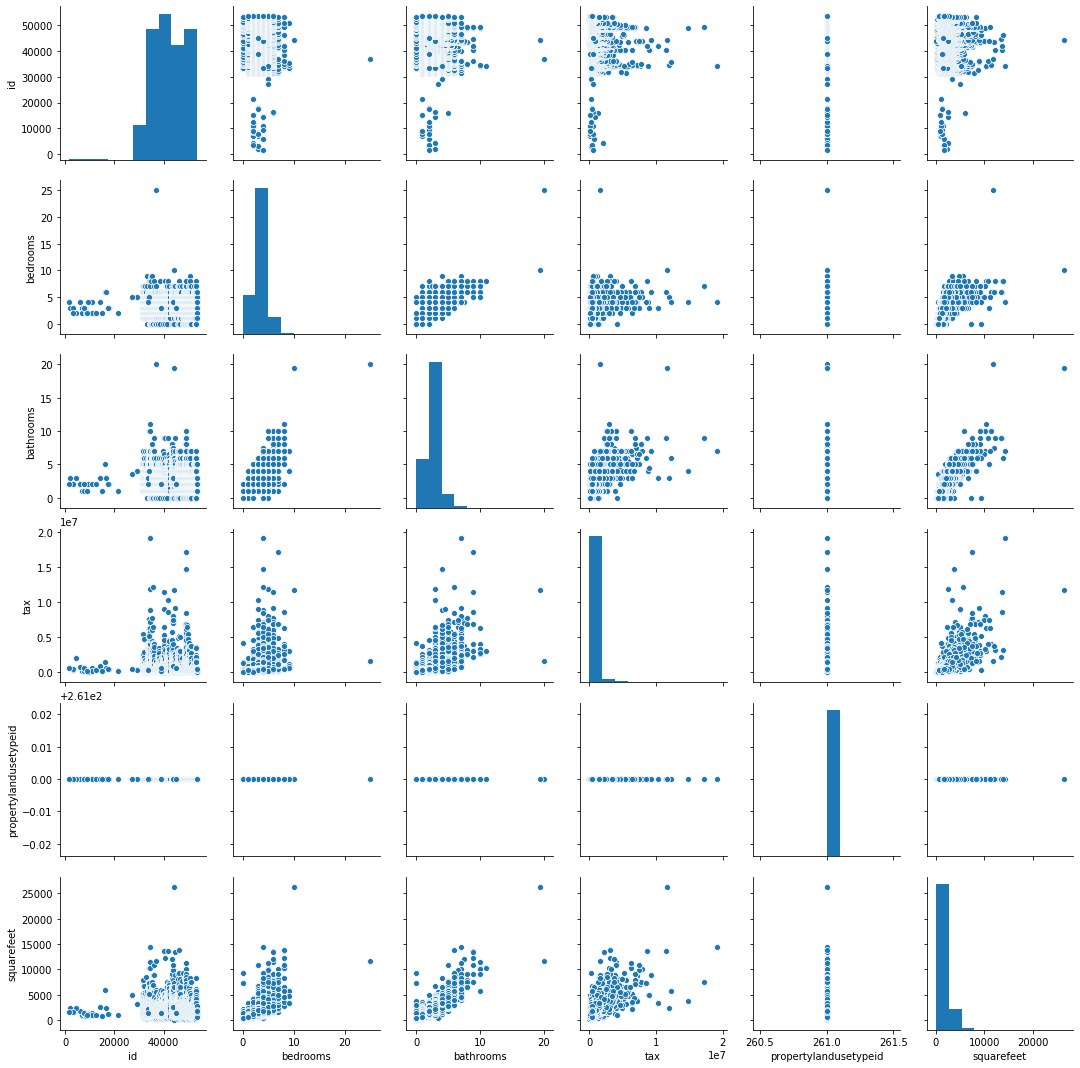

In [107]:
sns.pairplot(df)

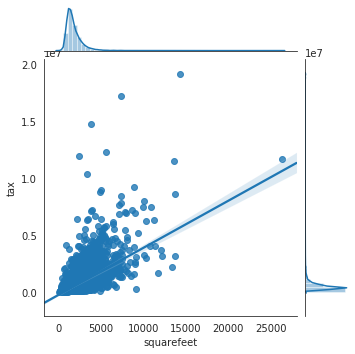

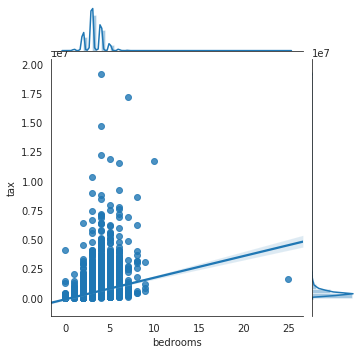

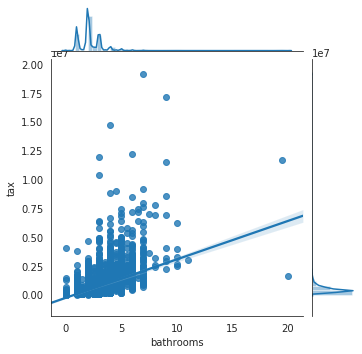

In [108]:
with sns.axes_style('white'):
    square = sns.jointplot("squarefeet", "tax", data=df, kind='reg', height=5);
plt.show()
with sns.axes_style('white'):
    bedroom = sns.jointplot("bedrooms", "tax", data=df, kind='reg', height=5);
plt.show()
with sns.axes_style('white'):
    bathroom = sns.jointplot("bathrooms", "tax", data=df, kind='reg', height=5);
plt.show()

X_train = train.drop(columns='tax')
y_train = train[['tax']]
X_test = test.drop(columns='tax')
y_test = test[['tax']]

Training 

In [86]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [87]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[-113230.05494648   92372.06731678     361.0402517 ]]


In [116]:
#fit and train model
lm.fit(X_train,y_train)
lm_y_intercept = lm1.intercept_
lm_coefficients = lm1.coef_

print('{} = b + m1 * {} + m2 * {}'.format(y_train.columns[0], X_train.columns[0],X_train.columns[1]))
print('    y-intercept  (b): %.2f' % lm_y_intercept)
print('    coefficient (m1): %.2f' % lm_coefficients[0][0])
print('    coefficient (m2): %.2f' % lm_coefficients[0][1])

tax = b + m1 * bedrooms + m2 * bathrooms
    y-intercept  (b): -44997.45
    coefficient (m1): -113230.05
    coefficient (m2): 92372.07


Text(0, 0.5, 'Predicted Y')

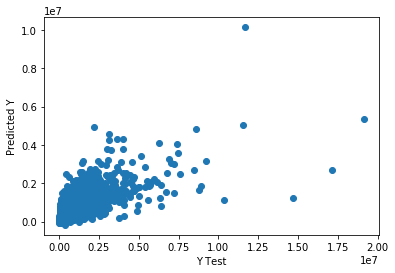

In [115]:
#scatterplot of the real test values versus the predicted values
predictions = lm.predict( X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [118]:
#target prediction

y_pred_lm = lm.predict(X_train)

In [124]:
y_pred_lm

array([[618868.694365  ],
       [202977.4429628 ],
       [216614.62555844],
       ...,
       [289988.14362321],
       [432960.08329757],
       [230470.7392114 ]])

In [126]:
from sklearn.metrics import mean_squared_error

SSE_function = mean_squared_error(df.y, df.yhat)*len(df)

print("SSE == SSE_function: ", SSE == SSE_function) 

AttributeError: 'DataFrame' object has no attribute 'y'

NameError: name 'mean_squared_error' is not defined